# Problem 1 - Decision Tree Classifier

The classification technique is a systematic approach to build classification models from an input dat set. For example, decision tree classifiers, rule-based classifiers, neural networks, support vector machines, and naive Bayes classifiers are different technique to solve a classification problem. Each technique adopts a learning algorithm to identify a model that best fits the relationshio between the attribute set and class label of the input data. Therefore, a key objective of the learning algorithm is to build prdictive model that accurately predict the class labels of previously unkonw records.

Decision Tree Classifier is a simple and widely used classification technique. It applies a straitforward idea to solve the classification problem. Decision Tree Classifier poses a series of carefully crafted questions about the attributes of the test record. Each time time it receive an answer, a follow-up question is asked until a conclusion about the calss label of the record is reached.

$Importing$ $all$ $the$ $relevant$ $libraries$

In [93]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

$Loading$ $dataset$ $using$ $Pandas$ $read csv$ $function$ 

In [129]:
trainX = pd.read_csv('P1_data/trainX.csv',header=None)
trainY = pd.read_csv('P1_data/trainY.csv',header=None)

testX = pd.read_csv('P1_data/testX.csv',header=None)
testY = pd.read_csv('P1_data/testY.csv',header=None)

In [130]:
trainX.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,12.83,22.33,85.26,503.2,0.10880,0.17990,0.16950,0.06861,0.2123,0.07254,...,15.20,30.15,105.30,706.0,0.1777,0.5343,0.6282,0.1977,0.3407,0.12430
1,12.86,13.32,82.82,504.8,0.11340,0.08834,0.03800,0.03400,0.1543,0.06476,...,14.04,21.08,92.80,599.5,0.1547,0.2231,0.1791,0.1155,0.2382,0.08553
2,17.93,24.48,115.20,998.9,0.08855,0.07027,0.05699,0.04744,0.1538,0.05510,...,20.92,34.69,135.10,1320.0,0.1315,0.1806,0.2080,0.1136,0.2504,0.07948
3,19.16,26.60,126.20,1138.0,0.10200,0.14530,0.19210,0.09664,0.1902,0.06220,...,23.72,35.90,159.80,1724.0,0.1782,0.3841,0.5754,0.1872,0.3258,0.09720
4,13.66,15.15,88.27,580.6,0.08268,0.07548,0.04249,0.02471,0.1792,0.05897,...,14.54,19.64,97.96,657.0,0.1275,0.3104,0.2569,0.1054,0.3387,0.09638


In [131]:
print('Shape of training dataset '+ str(trainX.shape))
print('Shape of training label dataset '+ str(trainY.shape))
print('Shape of test dataset '+ str(testX.shape))

Shape of training dataset (455, 30)
Shape of training label dataset (455, 1)
Shape of test dataset (57, 30)


### Dataset Description 
Wisconsin Diagnostic Breast Cancer(WDBC) dataset from the UCI repos-
itory. Each row in the dataset represents a sample of biopsied tissue. The tissue for each sample is
imaged and 10 characteristics of the nuclei of cells present in each image are characterized.

Size - (455,30)

The characteristics choosen for generating dataset: Radius, Texture, Perimeter, Area, Smoothness, Compactness, Concavity, Number of concave portions of contour, Symmetry, Fractal dimension



In [163]:
def MSE(predicted,Y):
    s=0
    for i in range(len(predicted)):
        s+=(predicted[i]-Y[i])**2
    s=s/len(predicted)
    return s
depth = []
maxnodes = list(range(10,101,10))
validationX = trainX[0:int(0.3*len(trainX))]
validationY = trainY[0:int(0.3*len(trainY))]
validationY = validationY.values.tolist()

trainnewX = trainX[int(0.3*len(trainX)):]
trainnewY = trainY[int(0.3*len(trainY)):]
for i in range(3,10):
    clf = DecisionTreeClassifier(max_depth=i)
# Perform 7-fold cross validation 
    clf.fit(trainnewX,trainnewY)
    predicted = clf.predict(validationX)
    depth.append(MSE(predicted,validationY))
# print(depth)


Hence, maxdepth is 7


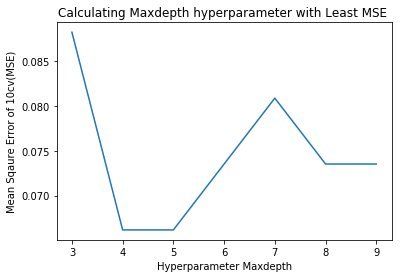

In [164]:
maxdepth = list(range(3,10))

plt.plot(maxdepth,depth)
plt.xlabel('Hyperparameter Maxdepth')
plt.ylabel('Mean Sqaure Error of 10cv(MSE)')
plt.title('Calculating Maxdepth hyperparameter with Least MSE ')
print('Hence, maxdepth is 7')

In [165]:
depth = []
maxnodes = list(range(10,101,10))
for i in maxnodes:
    clf = DecisionTreeClassifier(max_depth=7,max_leaf_nodes=i)
# Perform 7-fold cross validation 
    clf.fit(trainnewX,trainnewY)
    predicted = clf.predict(validationX)
    depth.append(MSE(predicted,validationY))
# print(depth)


Hence, max_leaf_nodes are 90


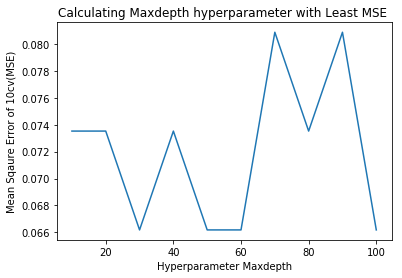

In [166]:
maxdepth = list(range(3,10))

plt.plot(maxnodes,depth)
plt.xlabel('Hyperparameter Maxdepth')
plt.ylabel('Mean Sqaure Error of 10cv(MSE)')
plt.title('Calculating Maxdepth hyperparameter with Least MSE ')
print('Hence, max_leaf_nodes are 90')

In [167]:
model = DecisionTreeClassifier(max_depth=7,max_leaf_nodes=80)
model.fit(trainX,trainY)
print(model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=80,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [168]:
print('                     Classification Report')
predicted = model.predict(testX)
print(metrics.classification_report(testY,predicted))
print('Confusion Matrix')
print(metrics.confusion_matrix(testY,predicted))

                     Classification Report
             precision    recall  f1-score   support

          0       0.85      0.88      0.86        32
          1       0.83      0.80      0.82        25

avg / total       0.84      0.84      0.84        57

Confusion Matrix
[[28  4]
 [ 5 20]]


In [169]:
print('(b)Total no of nodes')
print(model.tree_.node_count)

(b)Total no of nodes
33


In [170]:
n_nodes = model.tree_.node_count
children_left = model.tree_.children_left
children_right = model.tree_.children_right
feature = model.tree_.feature
threshold = model.tree_.threshold

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True
print('(c)Total Number of leaf nodes')
print(sum(is_leaves))

(c)Total Number of leaf nodes
17


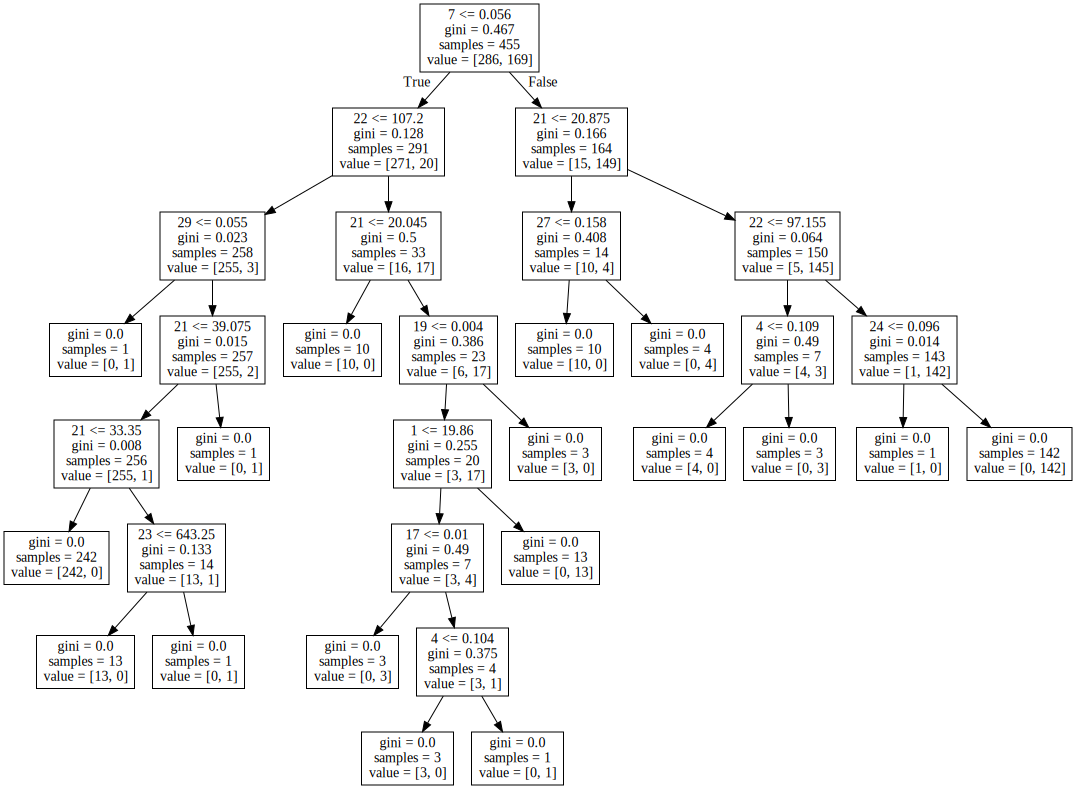

In [171]:
from graphviz import Source
from IPython.display import SVG
graph = Source(export_graphviz(model, out_file=None, feature_names=trainX.columns))
SVG(graph.pipe(format='svg'))

In [172]:
def accuracy(predicted,trainY):
    s=0
    for i in range(len(trainY)):
        #print(predicted[i],trainY[i])
        if(predicted[i] == trainY[i]):
            s+=1
    return float(s)/float(len(trainY))

In [173]:
traininacc = []
testacc = []
datasetsize = list(range(1,11))
for i in range(1,11):
    trainnewX = trainX[0:int(i*0.1*len(trainX))]
    trainnewY = trainY[0:int(i*0.1*len(trainX))]
    model = DecisionTreeClassifier()
    model.fit(trainnewX,trainnewY)
    trainnewY = trainnewY.values.tolist()

    predicted = model.predict(trainnewX)

    traininacc.append(accuracy(predicted,trainnewY))
    predicted = model.predict(testX)
    testnewY = testY.values.tolist()
    testacc.append(accuracy(predicted,testnewY))


Text(0.5,1,'Accuracy vs Dataset S')

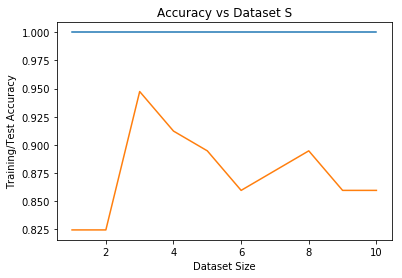

In [175]:
plt.plot(datasetsize,traininacc)
plt.plot(datasetsize,testacc)
plt.xlabel('Dataset Size')
plt.ylabel('Training/Test Accuracy')
plt.title('Accuracy vs Dataset S')


In [150]:
print(trainX.shape)

(455, 30)


### Conclusion

Hyperparameters can be easily calculated by plotting over Cross-validation score to get the best values of it.
The two main hyperparameters are max leaf nodes restriction and max depth restriction.The decision trees always give 
high accuracy for training dataset but for test the accuracy is changing with changes in dataset. 
